In [2]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [3]:
USAHousing = pd.read_csv("E:\\LEARNBAY\\Project - Jan\\march\\USA_Housing.csv")
USAHousing.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


# Data Preprocessing
4 steps comes in pre-processing
1. Missing value
2. Outlier treatment
3. Encoding
4. Imbalance data treatment
5. Feature Scaling - standardization

In [4]:
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


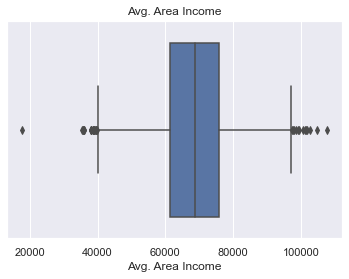

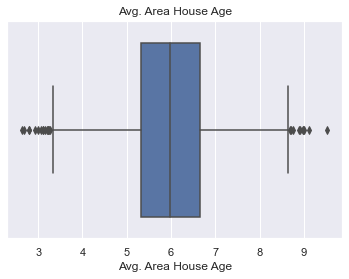

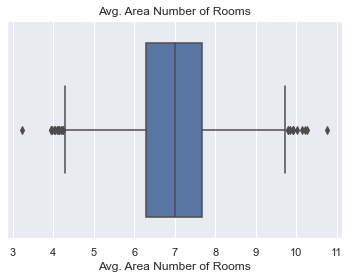

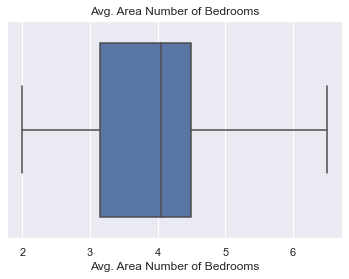

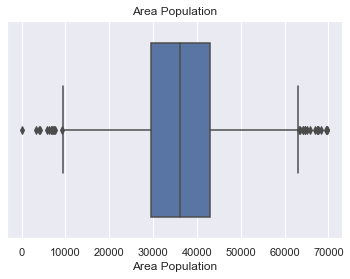

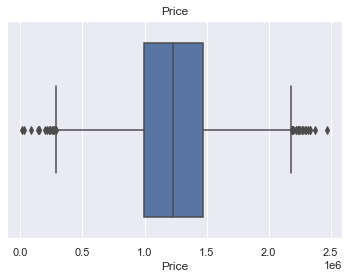

In [7]:
for i in USAHousing.select_dtypes(exclude = ['object']).columns:
#     print(i)
    sns.boxplot(USAHousing[i])
    plt.title(i)
    plt.show()

In [8]:
Q1=USAHousing.quantile(0.25)
Q3 = USAHousing.quantile(0.75)
IQR = Q3-Q1
posoutl= Q3 +1.5*IQR
ngoutl =Q1 - 1.5*IQR

In [9]:
print("***********Q1***************")
print(Q1)
print("***********Q3***************")
print(Q3)
print("***********IQR***************")
print(IQR)
print("***********POSITIVE OUTLIER***************")
print(posoutl)
print("***********NEGETIVE OUTLIER***************")
print(ngoutl)

***********Q1***************
Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
***********Q3***************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
***********IQR***************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
***********POSITIVE O

we need to remove the outlier...
so we have the poiunts beyond which we will get opositive outlier and negative outlier.

# Outlier Treatment - 
tilda sign ~ (comparing)
Ignoring the Outliers --- in the below way

In [10]:
USAHousing = USAHousing[~(((USAHousing < ngoutl) | 
                           (USAHousing > posoutl))).any(axis = 1)]

In [11]:
USAHousing.shape

(4865, 7)

In [12]:
# ONly 2.7% of data lies in outlier...hence ignorig the same. 
(5000-4865)/5000 *100 

2.7

Removing the variable which is not going to impact the house cost.

In [13]:
USAHousing = USAHousing.iloc[:,:-1]

# Exploratory Data Analysis

In [14]:
USAHousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [15]:
from pandas_profiling import ProfileReport
report = ProfileReport(USAHousing)
report.to_file(output_file='USAHousing.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<AxesSubplot:>

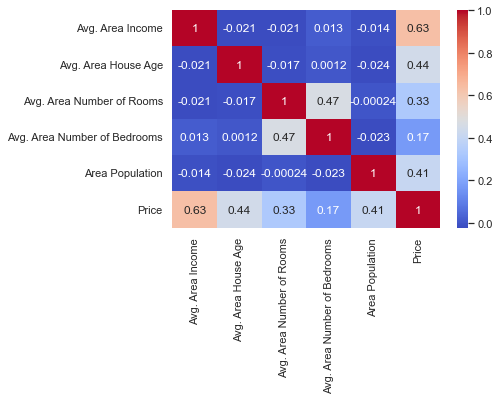

In [17]:
sns.heatmap(USAHousing.corr(),annot = True,cmap = 'coolwarm')

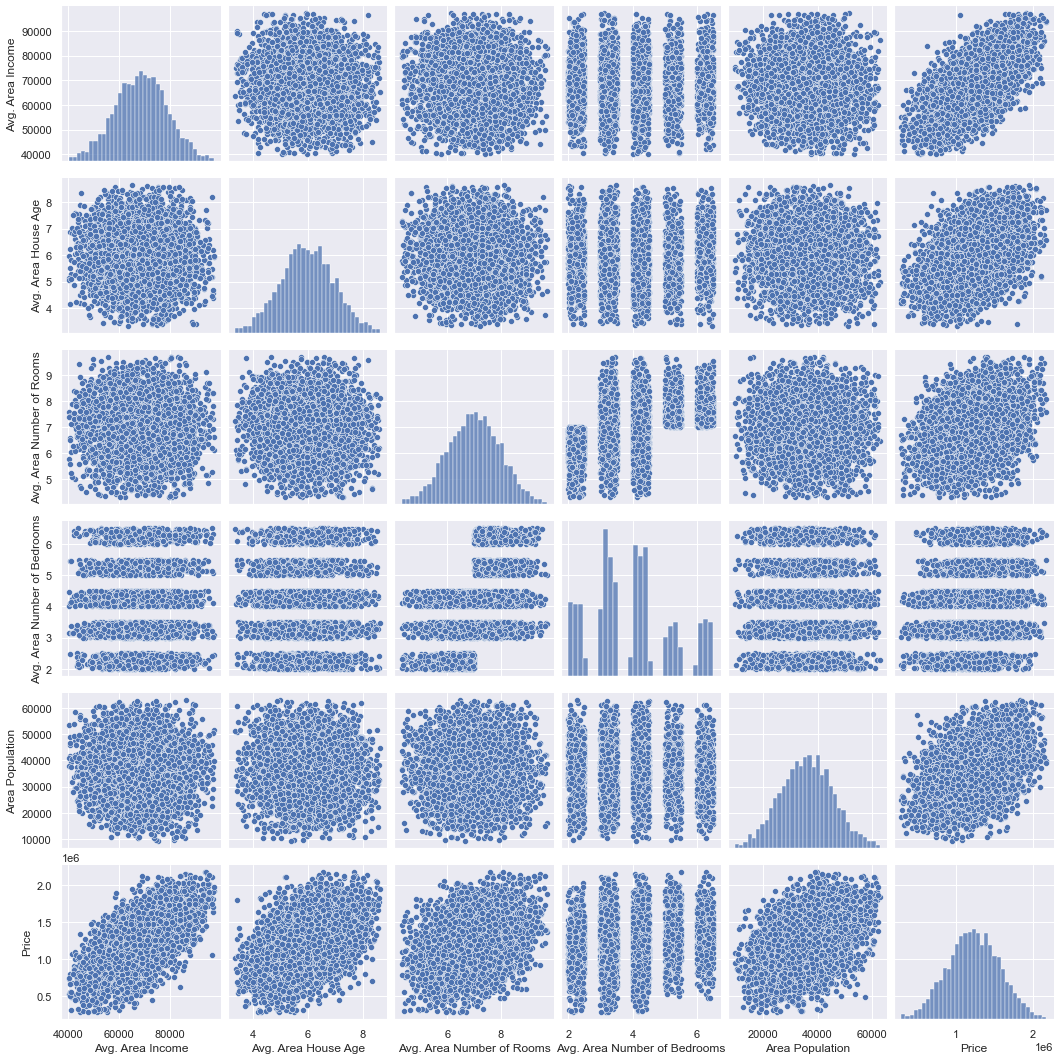

In [18]:
sns.pairplot(USAHousing)

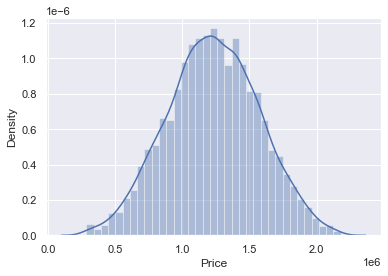

In [19]:
sns.distplot(USAHousing['Price'])
plt.show()

# Spliting the data

In [20]:
x = USAHousing.drop(columns=['Price'],axis=1) #IDV
y=USAHousing['Price']  #DV

In [21]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [22]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4865, dtype: float64

# Feautre Scaling
A must for a regression problem. 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

# EDA COMPLETES

# Spliting the data into training and testing dataset.

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.2,random_state = 217)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3892, 5) (973, 5) (3892,) (973,)


In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.coef_

array([222544.82103084, 158562.74848875, 118814.34462944,   2283.93173986,
       143605.6018849 ])

In [29]:
lr.intercept_

1230667.9069732397

# Predicting the accurac of the model 

In [30]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Evaluation metrics

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.9098501978930061

Good model - as r2_score is 90%

In [32]:
# Building the OLS Method

In [33]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [34]:
reg_model = smf.OLS(endog=y_train,exog=x_train).fit()

In [35]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              58.18
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                    1.47e-58
Time:                        06:13:22   Log-Likelihood:                         -60113.
No. Observations:                3892   AIC:                                  1.202e+05
Df Residuals:                    3887   BIC:                                  1.203e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.311e+05   1.99e+04     11.634      0.000    1.92e+05     2.7e+05
x2          1.571e+05   1.98e+04      7.952      0.000    1.18e+05    1.96e+05
x3          1.327e+05   2.22e+04      5.981      0.000    8.92e+04    1.76e+05
x4          1.277e+04   2.23e+04      0.571      0.568    -3.1e+04    5.66e+04
x5          1.475e+05   1.98e+04      7.437      0.000    1.09e+05    1.86e+05
==============================================================================
Omnibus:                        5.517   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.809
Skew:                          -0.004   Prob(JB):                       0.0903
Kurtosis:                       2.828   Cond. No.                         1.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Assumptions:

1. DV and IDV and linearly replated. (See the pair plot.) -- Done
2. Homoscadasticity -- Equal variance should be there...if not, do outlier treatment. --- Done. (Outliers were only 2.7% which
                                                                                               have been ignored)
3. Normality -- Residual are normally distributed -- which means .. make a q-q plot (between the predicted value and actual 
                                                                                    value) - DOne below.
4. Durbin test -- 2 (in the OLS method) which means there is no problem of autocorrelation.   - Done
5. Multicolinearity -- corr() matrix has been checked and seen that the data is not correlated. - Done
6. p-value -- OLS has given p-value for all the IDV and all are less than 0.05. So, all the variables are significant for the model.- Done
7. R2- value needs to be good. In the OLS test, we get the R2 value...although it is very very low. - Done
8. endogenity - Dependent Variable should be correct. OLS shows it is. Done

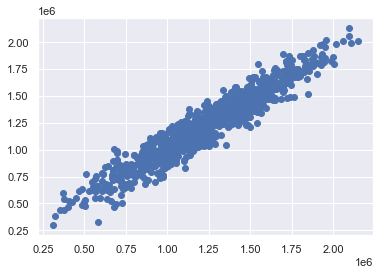

In [36]:
# CHecking the normality

plt.scatter(y_test,y_pred_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

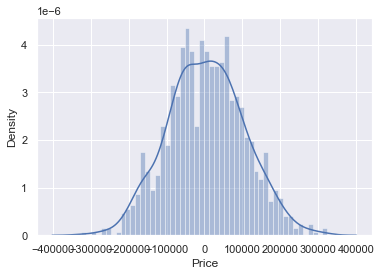

In [37]:
sns.distplot((y_test-y_pred_test),bins = 50)
# the residual/error/loss/ or (predicted - actual) is also normally distributed. 

#Since in OLS - R2 value is very low, around 0.068, trying to pass data without feature scaling. OLS method handles the 
scaling part as well. Splitting the data again but this time, passing only x and y(unscaled data). 

In [38]:
x_train1,x_test1,y_train1,y_test1= train_test_split(x,y,test_size = 0.2,random_state = 217)

In [39]:
stats_model1 = smf.OLS(endog =y_train1, exog=x_train1).fit()

In [40]:
stats_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.253e+04
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                        0.00
Time:                        06:13:24   Log-Likelihood:                         -53636.
No. Observations:                3892   AIC:                                  1.073e+05
Df Residuals:                    3887   BIC:                                  1.073e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1599      0.303     33.508      0.000       9.565      10.754
Avg. Area House Age            4.95e+04   3295.309     15.023      0.000     4.3e+04     5.6e+04
Avg. Area Number of Rooms    -4702.4555   3638.665     -1.292      0.196   -1.18e+04    2431.418
Avg. Area Number of Bedrooms  3054.6729   3426.320      0.892      0.373   -3662.882    9772.228
Area Population                  7.6993      0.368     20.914      0.000       6.978       8.421
==============================================================================
Omnibus:                       13.618   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.790
Skew:                          -0.031   Prob(JB):                      0.00454
Kurtosis:                       2.750   Cond. No.                     9.40e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 value is very good. Model is good. 
DurbinWatson is near 2
All variables are significant. 

# TO HANDLE OVERFITING  PROBLEM
To find out if overfitting is there, we do regularization process. 

If the r2_score of model and ridge/lasso/elastic_net is similar, then no overfitting problem is there. 

Regulation is done.
1. RIdge
2. Lasso
3. Elastic Net

Underfitting proble is when the model is not good...R2 value is very low....we know that there is underfitting problem. 

In [41]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

# Ridge

In [42]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.9098498985393039

In [43]:
ridge.coef_

array([222538.88483585, 158558.43525995, 118810.3950509 ,   2285.64387469,
       143601.70389422])

# Lasso

In [44]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.909850185789993

In [45]:
lasso.coef_

array([222544.7223565 , 158562.65019314, 118814.33671549,   2283.83282826,
       143605.49277853])

# Elastic Net

In [46]:
elasticnet = ElasticNet(alpha=0.1,l1_ratio = 0.5)
elasticnet.fit(x_train,y_train)
y_pred_en = elasticnet.predict(x_test)
r2_score(y_test,y_pred_en)

0.9070706804436721

# Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr_test = lr.predict(x_test)
r2_score(y_test,y_pred_lr_test)

0.9098501978930061

In [48]:
y_pred_lr_train = lr.predict(x_train)
r2_score(y_train,y_pred_lr_train)

0.9122158297652133

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
y_pred_dt = dtree.predict(x_test)

In [54]:
r2_score(y_test,y_pred_dt)

0.7323997442444112

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [78]:
y_pred_rf = rf.predict(x_test)

In [79]:
r2_score(y_test,y_pred_rf)

0.8650751153344854

In [ ]:
All Points matches: 
    
1. DV and IDV and linearly replated. (See the pair plot.) -- Done
2. Homoscadasticity -- Equal variance should be there...if not, do outlier treatment. --- Done. (Outliers were only 2.7% which
3. Normality -- Residual are normally distributed -- which means .. make a q-q plot (between the predicted value and actual 
4. Durbin test -- 2 (in the OLS method) which means there is no problem of autocorrelation.   - Done
5. Multicolinearity -- corr() matrix has been checked and seen that the data is not correlated. - Done
6. p-value -- OLS has given p-value for all the IDV and all are less than 0.05. So, all the variables are significant for the model.- Done
7. R2- value needs to be good. In the OLS test, we get very good R2 value. - Done
8. endogenity - Dependent Variable should be correct. OLS shows it is. Done
9. No high variance and no high bias. Model is neither overfitting or underfitting. 


# Model Measurment

1. MSE
2. RMSE
3. MAE
4. MAPE


In [128]:
from sklearn import metrics

In [132]:
print("MSE",metrics.mean_squared_error(y_test,y_pred_test))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("MAE",metrics.mean_absolute_error(y_test,y_pred_test))
print("MAPE",metrics.mean_absolute_percentage_error(y_test,y_pred_test))


MSE 10277968492.346283
RMSE 101380.31609906473
MAE 81438.18082235
MAPE 0.0744586092708303


# Linear Regression DONE